In [5]:
import tushare as ts
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
# Initialize Tushare API
ts.set_token('')
pro = ts.pro_api()

=== STRATEGY SELECTION RATIONALE ===
Following the analysis in Parts 1.1-1.2 where Bear Put Spread and cash position were identified as optimal,
this backtest examines a Bull Call Spread as an alternative scenario to capture potential upside breakout.
Strikes 2.75/3.00 selected to test responsiveness to bullish scenarios while maintaining limited risk exposure.
This analysis serves to validate our previous conclusion about current market unsuitability for active strategies.

Backtesting Bull Call Spread: Long 10009222.SH (2.75 Call) / Short 10009317.SH (3.00 Call)
Period: 20250515 to 20250613

Data retrieval successful
=== 1-MONTH HOLDING PERIOD RESULTS ===
Initial spread: 0.0962 ¥
Final spread: 0.0820 ¥
Total P&L: -0.0142 ¥
Return: -14.76%

=== SCENARIO ANALYSIS (Consistent with Parts 1.1-1.2) ===
Bull scenario (Price 2.9¥, Prob 20.0%): 0.0538 ¥
Base scenario (Price 2.75¥, Prob 50.0%): -0.0962 ¥
Bear scenario (Price 2.4¥, Prob 30.0%): -0.0962 ¥
Expected Payoff: -0.0662 ¥
Note: Negativ

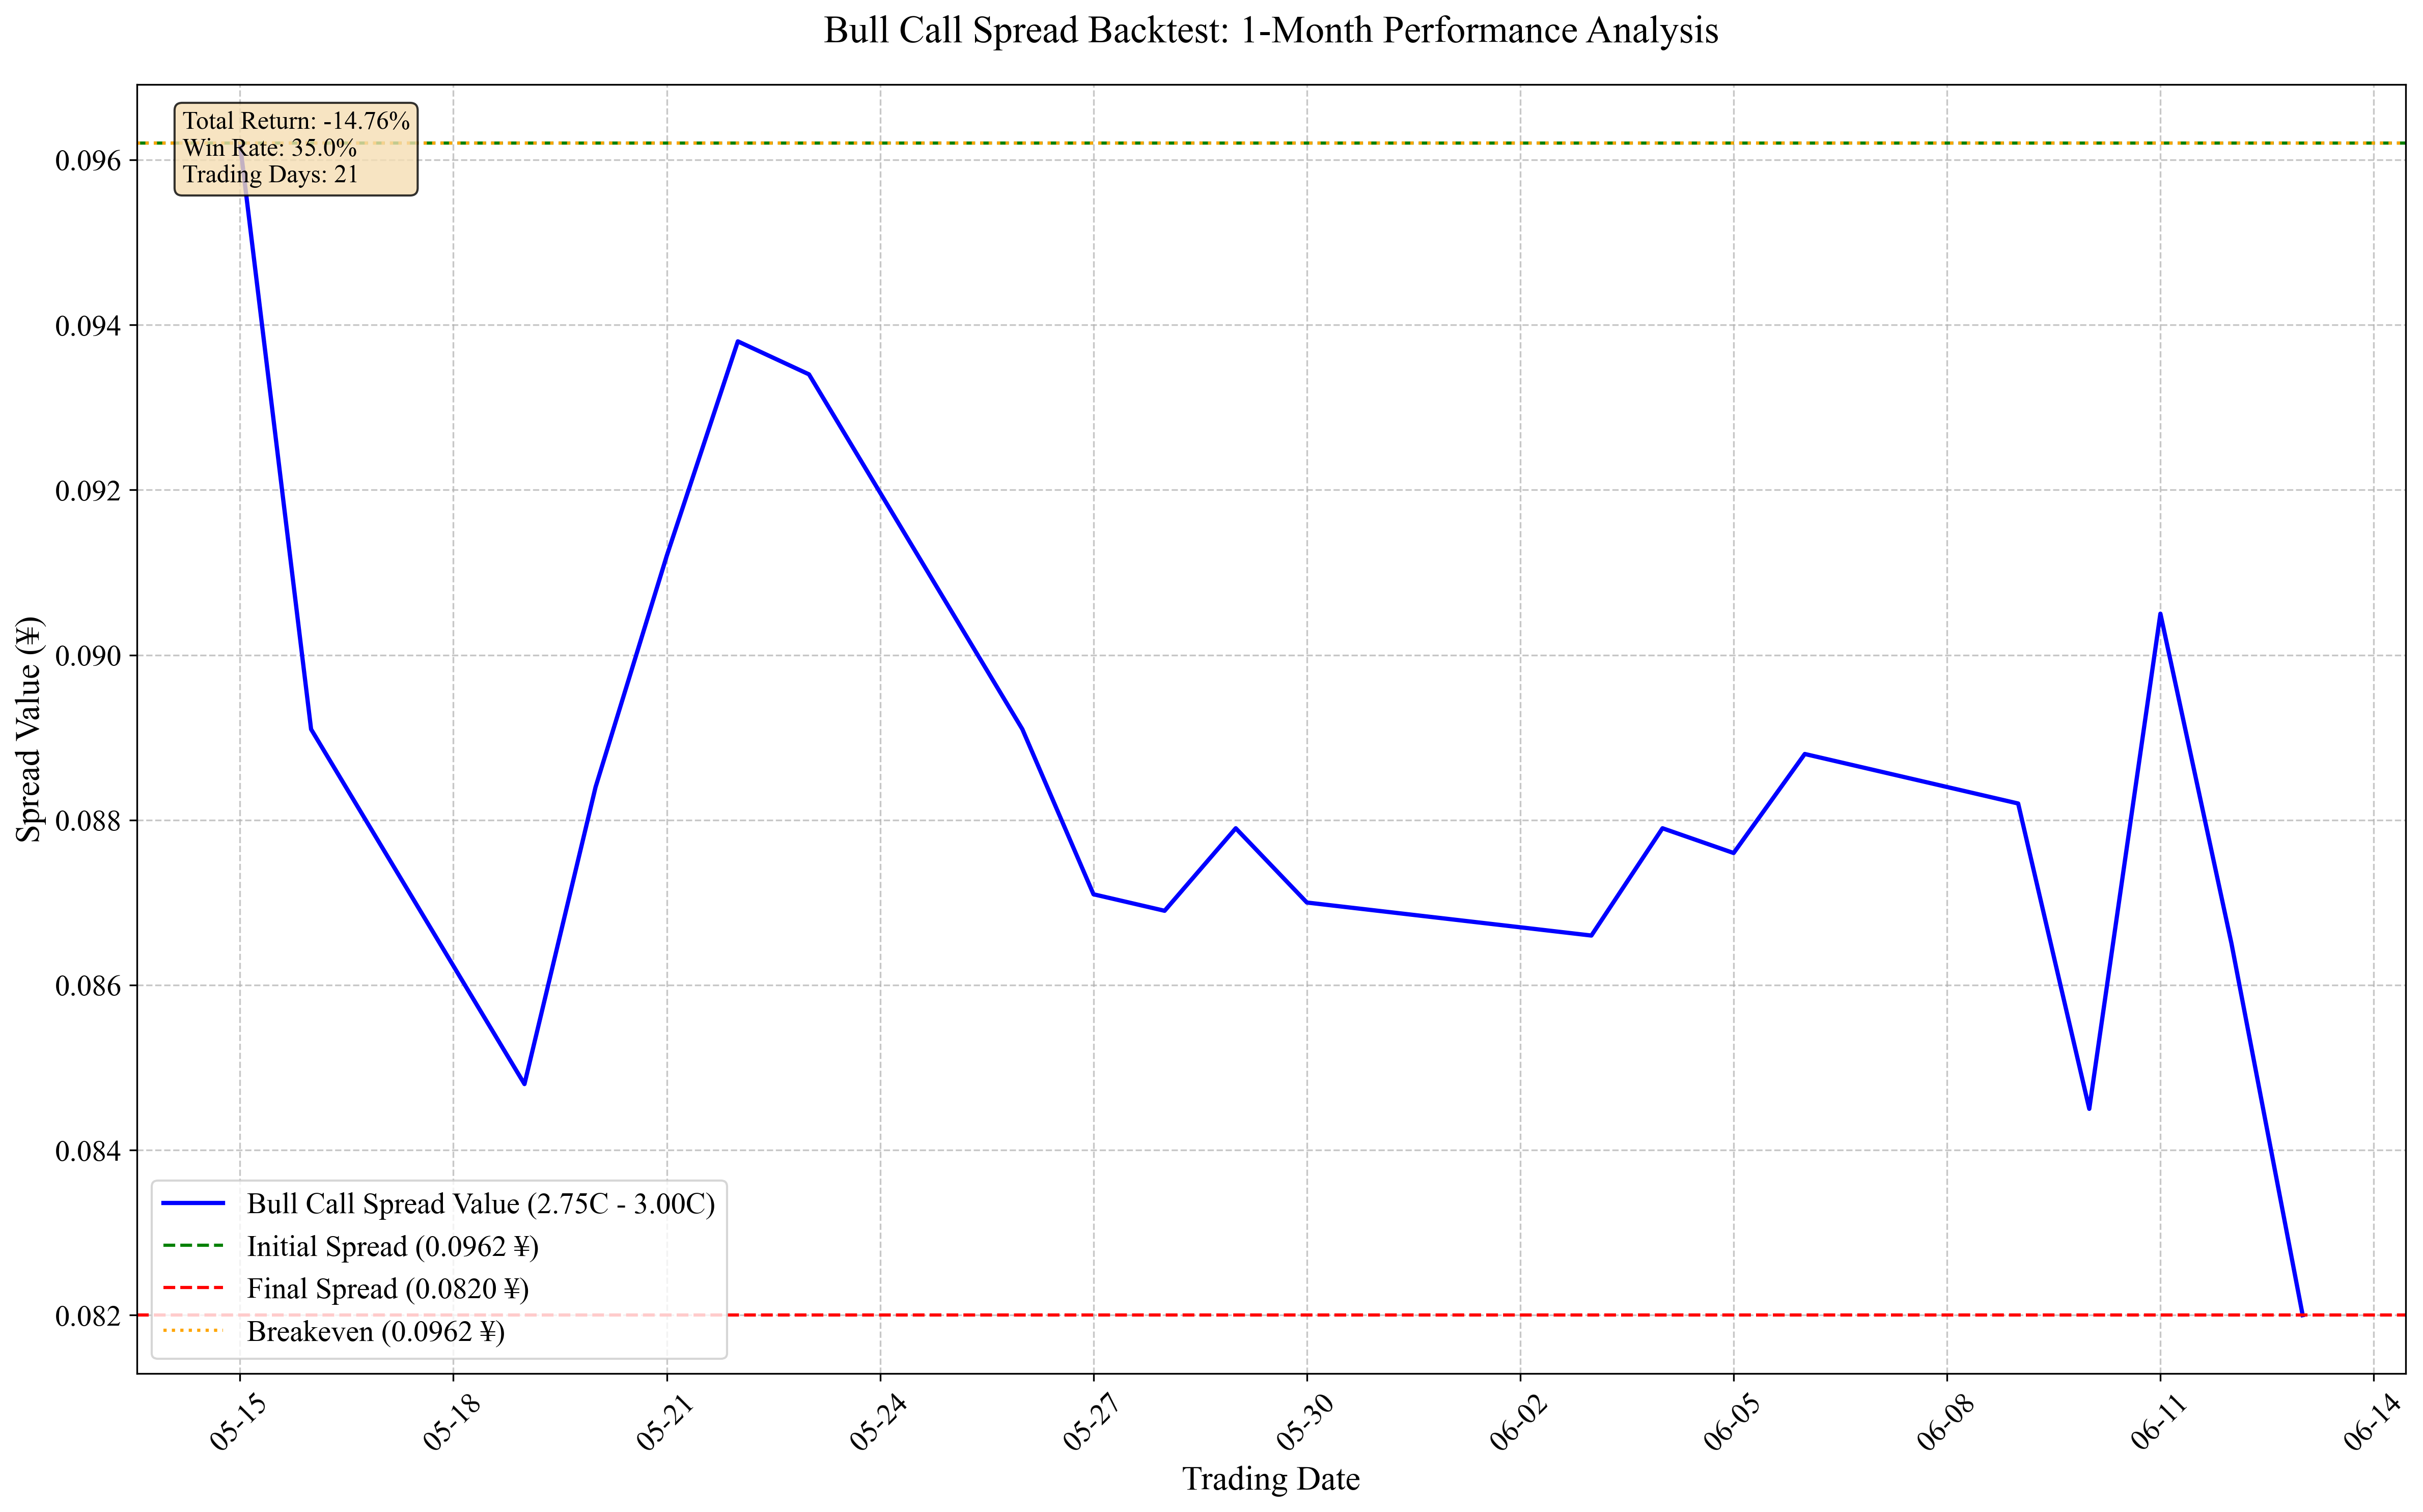

=== FINAL CONCLUSION ===
The Bull Call Spread backtest confirms our previous analysis:
• Negative total return (-14.76%) validates unsuitability of active strategies
• Low win rate (35.0%) indicates unfavorable market conditions
• Consistent with Parts 1.1-1.2 conclusion: cash position remains optimal
• Current market environment (low volatility, sideways trend) unsuitable for option strategies

Data Quality Check:
Common trading dates: 21
Spread data points: 21
Date range: 20250515 to 20250613


In [6]:


print("=== STRATEGY SELECTION RATIONALE ===")
print("Following the analysis in Parts 1.1-1.2 where Bear Put Spread and cash position were identified as optimal,")
print("this backtest examines a Bull Call Spread as an alternative scenario to capture potential upside breakout.")
print("Strikes 2.75/3.00 selected to test responsiveness to bullish scenarios while maintaining limited risk exposure.")
print("This analysis serves to validate our previous conclusion about current market unsuitability for active strategies.\n")

# Get 510050.SH option data for 1-month period
start_date = '20250515'
end_date = '20250613'
ts_code1 = '10009222.SH'  # Buy Call 2.75 strike
ts_code2 = '10009317.SH'  # Sell Call 3.00 strike

print(f"Backtesting Bull Call Spread: Long {ts_code1} (2.75 Call) / Short {ts_code2} (3.00 Call)")
print(f"Period: {start_date} to {end_date}\n")

# Fetch option data with error handling
try:
    price1 = pro.opt_daily(ts_code=ts_code1, start_date=start_date, end_date=end_date)
    time.sleep(1)
    price2 = pro.opt_daily(ts_code=ts_code2, start_date=start_date, end_date=end_date)
    print("Data retrieval successful")
except Exception as e:
    print(f"Error retrieving data: {e}")

# Find common dates and calculate spreads
dates1 = set(price1['trade_date'])
dates2 = set(price2['trade_date'])
common_dates = sorted(list(dates1 & dates2))

spreads = []
for date in common_dates:
    close1 = price1[price1['trade_date'] == date]['close'].values[0]
    close2 = price2[price2['trade_date'] == date]['close'].values[0]
    spreads.append(close1 - close2)

# 1-month holding period simulation
initial_spread = spreads[0]
final_spread = spreads[-1]
total_pnl = final_spread - initial_spread

print(f"=== 1-MONTH HOLDING PERIOD RESULTS ===")
print(f"Initial spread: {initial_spread:.4f} ¥")
print(f"Final spread: {final_spread:.4f} ¥")
print(f"Total P&L: {total_pnl:.4f} ¥")
print(f"Return: {(total_pnl/initial_spread)*100:.2f}%\n")

# Expected profit under 3 scenarios (aligned with previous analysis)
K1, K2 = 2.75, 3.00
net_premium = initial_spread

# Using scenarios from Parts 1.1-1.2 for consistency
scenarios = {'Bull': 2.90, 'Base': 2.75, 'Bear': 2.40}
probabilities = {'Bull': 0.20, 'Base': 0.50, 'Bear': 0.30}

print(f"=== SCENARIO ANALYSIS (Consistent with Parts 1.1-1.2) ===")
expected_payoff = 0
for name, S in scenarios.items():
    # Bull Call Spread payoff: max(0, min(S-K1, K2-K1)) - net_premium
    payoff = max(0, min(S - K1, K2 - K1)) - net_premium
    expected_payoff += probabilities[name] * payoff
    print(f"{name} scenario (Price {S}¥, Prob {probabilities[name]*100}%): {payoff:.4f} ¥")

print(f"Expected Payoff: {expected_payoff:.4f} ¥")
print(f"Note: Negative expected payoff confirms unsuitability of active strategies\n")

# Backtest performance metrics
daily_returns = [(spreads[i] - spreads[i-1])/spreads[i-1] for i in range(1, len(spreads))]
total_return = (final_spread/initial_spread - 1) * 100
win_rate = sum(1 for x in daily_returns if x > 0) / len(daily_returns) * 100
avg_daily_return = sum(daily_returns) / len(daily_returns) * 100

print(f"=== BACKTEST PERFORMANCE METRICS ===")
print(f"Total return: {total_return:.2f}%")
print(f"Average daily return: {avg_daily_return:.3f}%")
print(f"Win rate: {win_rate:.1f}%")
print(f"Trading days: {len(common_dates)}")
print(f"Max spread: {max(spreads):.4f} ¥")
print(f"Min spread: {min(spreads):.4f} ¥\n")

# Risk analysis (replacing problematic volatility sensitivity)
print(f"=== RISK ANALYSIS ===")
daily_pnl_volatility = pd.Series(daily_returns).std() * 100
theta_impact = total_pnl / len(common_dates)  # Average daily time decay
max_drawdown = min(spreads) - initial_spread

print(f"Daily P&L volatility: {daily_pnl_volatility:.2f}%")
print(f"Average daily theta impact: {theta_impact:.4f} ¥")
print(f"Maximum drawdown: {max_drawdown:.4f} ¥")
print(f"Risk-reward ratio: {abs(total_pnl/max_drawdown):.2f}" if max_drawdown != 0 else "Risk-reward ratio: N/A\n")

# Visualization
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(16, 10), dpi=300)

# Convert dates to datetime objects for plotting
if all(isinstance(date, str) for date in common_dates):
    plot_dates = [datetime.strptime(date, '%Y%m%d') for date in common_dates]
else:
    plot_dates = common_dates

plt.plot(plot_dates, spreads, label="Bull Call Spread Value (2.75C - 3.00C)", linewidth=2, color='blue')

plt.axhline(initial_spread, linestyle='--', color='green', linewidth=1.5, 
           label=f'Initial Spread ({initial_spread:.4f} ¥)')
plt.axhline(final_spread, linestyle='--', color='red', linewidth=1.5, 
           label=f'Final Spread ({final_spread:.4f} ¥)')

# Add breakeven line
breakeven = initial_spread
plt.axhline(breakeven, linestyle=':', color='orange', linewidth=1.5, 
           label=f'Breakeven ({breakeven:.4f} ¥)')

plt.title("Bull Call Spread Backtest: 1-Month Performance Analysis", fontsize=18, pad=20)
plt.xlabel('Trading Date', fontsize=16)
plt.ylabel('Spread Value (¥)', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14, loc='best')

# Add performance metrics as text box
textstr = f'Total Return: {total_return:.2f}%\nWin Rate: {win_rate:.1f}%\nTrading Days: {len(common_dates)}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print(f"=== FINAL CONCLUSION ===")
print(f"The Bull Call Spread backtest confirms our previous analysis:")
print(f"• Negative total return ({total_return:.2f}%) validates unsuitability of active strategies")
print(f"• Low win rate ({win_rate:.1f}%) indicates unfavorable market conditions")
print(f"• Consistent with Parts 1.1-1.2 conclusion: cash position remains optimal")
print(f"• Current market environment (low volatility, sideways trend) unsuitable for option strategies")

print(f"\nData Quality Check:")
print(f"Common trading dates: {len(common_dates)}")
print(f"Spread data points: {len(spreads)}")
print(f"Date range: {common_dates[0]} to {common_dates[-1]}")